<a href="https://colab.research.google.com/github/yasinalharits/course-nlp/blob/main/Sentimen_Analisis_Tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import re
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [2]:
df = pd.read_csv('/content/tweet.csv')
del df[df.columns[0]]
df

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [3]:
df.sentimen.value_counts()

positif    612
netral     607
negatif    596
Name: sentimen, dtype: int64

# EDA
- coba cek kata apa aja yg paling banyak keluar untuk setiap label (positif, netral dan negatif) buat dijadiin stop words

- hapus dulu url dan karakter non-word


### coba pisahin kata di hashtag

In [4]:
# pisahin kata di hashtag
# ambil ada hashtag apa aja?
list_hashtag = []

for kalimat in df.tweet:
  if ('#' in kalimat):
    result = re.findall('\#\S+', kalimat)
    list_hashtag.append(result)

#for hashtag in list_hashtag:
print(f'List hashtag: {list_hashtag}\n{len(list_hashtag)}')

# bersihkan hashtag dari tanda #
cleaned_hashtag = []
for i in range(len(list_hashtag)):
  for hashtag in list_hashtag[i]:
    hashtag = re.sub(r'\#', '', hashtag)
    hashtag = re.sub(r'\d', '', hashtag)
    #print(hasil)
    cleaned_hashtag.append(hashtag)
#print(f'cleaned hashtag ke-4 :{cleaned_hashtag[4]}')
#print(len(cleaned_hashtag))
#noduplikat_cleaned_hashtag = list(dict.fromkeys(cleaned_hashtag))
#print(len(noduplikat_cleaned_hashtag))
#print(noduplikat_cleaned_hashtag[0])
#for i in noduplikat_cleaned_hashtag[0]:
#  if (i.isupper()):
#noduplikat_cleaned_hashtag[0]
    #index = noduplikat_cleaned_hashtag[0].index(i)
    #print(f'{index} : {i}')
    #print(noduplikat_cleaned_hashtag[0][0:9])
#print(str(noduplikat_cleaned_hashtag[0]))
# cari index ke berapa huruf yg kapital
#for i in noduplikat_cleaned_hashtag:
#  for n in len(noduplikat_cleaned_hashtag)[i]:
#    if (noduplikat_cleaned_hashtag[i][n].isupper()):
#      print(f'{huruf} : {huruf.index()}')

#list_hashtag_bersih = []
#for hashtag in list_hashtag[0]:
#  hashtag = re.sub(r'\#', '', hashtag)
#  list_hashtag_bersih.append(hashtag)

#for i in range(len(list_hashtag[0])):
#  print(f'{i} : {list_hashtag[0][i]} {len(list_hashtag[0][i])}')
#  print(list_hashtag_bersih[0])
#  for n in range(len(list_hashtag[0][i])):
#    if (list_hashtag[0][i][n].isupper()):
#      print(f'{n} {list_hashtag[0][i][n]}')


List hashtag: [['#01IndonesiaMaju', '#JokowiLagi', '#JokowiMenangTotalDebat'], ['#UASdifitnahKejiBalasDiTPS', '#UASdifitnahKejiBalasDiTPS'], ['#GoAceh'], ['#PilihOrangBaik', '#PilihJelasIslamnya', '#PilihBajuPutih'], ['#2019JokowiKyaiMaruf'], ['#2019JokowiKyaiMaruf', '#RakyatInginJokowiMenang'], ['#PilihOrangBaik', '#PilihJelasIslamnya', '#PilihBajuPutih'], ['#UASdifitnahKejiDanBrutal', '#UASdifitnahKejiBalasDiTPS'], ['#Echobox=1555171378Â'], ['#17AprilTusukPrabowoSandi'], ['#PilihOrangBaik', '#PilihJelasIslamnya', '#PilihBajuPutih'], ['#PilihOrangBaik', '#PilihJelasIslamnya', '#PilihBajuPutih'], ['#UASdifitnahKejiBalasDiTPS'], ['#SAVE_UAS'], ['#PrabowoSandi', '#02MenangAdilMakmur'], ['#UASdifitnahKejiBalasDiTPS', '#UASdifitnahKejiBalasDiTPS'], ['#UASdifitnahKejiDanBrutal', '#UASdifitnahKejiDanBrutal', '#UASdifitnahKejiDanBrut'], ['#2019JokowiKyaiMaruf', '#1PeriodeLagiUntukJokowi', '#PesonaBonoSurfing'], ['#PilihOrangBaik', '#PilihYgJelasIslamnya', '#PilihYgBajuPutih'], ['#PilihOrangBa

# data kata terbanyak dan hashtag terbanyak

## sentimen positif

In [5]:
# visualisasi banyaknya hashtag tiap kelas sentimen

#ambil data dan pisahkan berdasarkan tiap label
data_positif = df[df['sentimen'] == 'positif']['tweet'].tolist()
#display(len(data_positif))
data_netral = df[df['sentimen'] == 'netral']['tweet'].tolist()
#display(len(data_netral))
data_negatif = df[df['sentimen'] == 'negatif']['tweet'].tolist()
#display(len(data_negatif))

# pisahin data yg hashtag dan bukan hashtag tiap label sentimen
# data sentimen positif
hashtag_positif = []
for kalimat in data_positif:
  kalimat = re.sub(r'[^\#a-zA-Z0-9\s]', '', kalimat)
  result = re.findall(r'\#\S+', kalimat)
  hashtag_positif.append(result)
for kata in hashtag_positif:
  if(kata ==[]):
    hashtag_positif.remove(kata)
#display(hashtag_positif[:5])
#display(len(hashtag_positif))

data_positif_no_hashtag = []
for kalimat in data_positif:
  kalimat = re.sub(r'\#\S+', ' ', kalimat)
  kalimat = re.sub(r'http[s]?\:\//\S+', '', kalimat)
  #kalimat = re.sub(r'\S+\.com\S+', '', kalimat)
  kalimat = re.sub(r'a{2,}', 'a', kalimat)              # ganti huruf vokal berulang
  kalimat = re.sub(r'i{2,}', 'i', kalimat)
  kalimat = re.sub(r'u{2,}', 'u', kalimat)
  kalimat = re.sub(r'e{2,}', 'e', kalimat)
  kalimat = re.sub(r'o{2,}', 'o', kalimat)
  kalimat = re.sub('\\xa0', '', kalimat)
  kalimat = re.sub(r'[^a-zA-Z0-9\s]', ' ', kalimat)
  kalimat = kalimat.lower()
  kalimat = re.sub(r'\s+', ' ', kalimat)
  kalimat = re.sub(r'^\s|\s$', '', kalimat)
  kalimat = re.split(r'\s', kalimat)
  data_positif_no_hashtag.append(kalimat)
#display(data_positif_no_hashtag[:5])
#display(len(data_positif_no_hashtag))

In [6]:
# visualisasi data 10 kata terbanyak dan 10 hashtag terbanyak di label sentimen positif
import itertools
from collections import Counter, OrderedDict

hashtag_positif_flattened = itertools.chain(*hashtag_positif)
hashtag_positif_count = Counter(hashtag_positif_flattened)
hashtag_positif_count_sorted = OrderedDict(sorted(hashtag_positif_count.items(), key = lambda kv : kv[1], reverse=False))

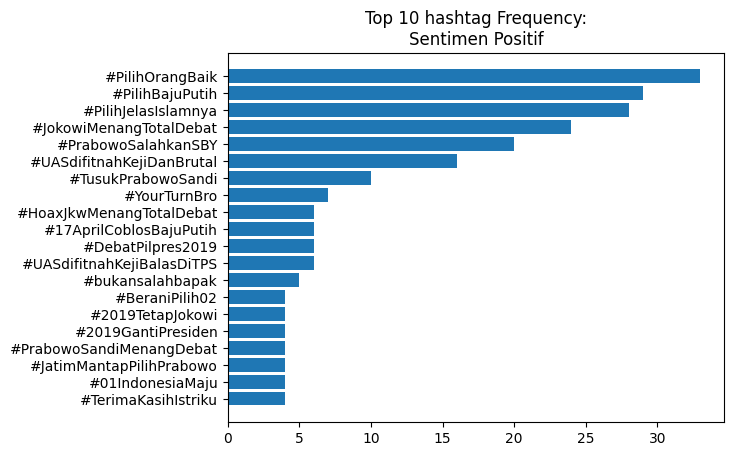

In [7]:
# visualisasi top hashtag terbanyak sentimen positif
import matplotlib.pyplot as plt

plt.barh(
    list(hashtag_positif_count_sorted.keys())[-20:],
    list(hashtag_positif_count_sorted.values())[-20:]
)
plt.title('Top 10 hashtag Frequency:\nSentimen Positif')
plt.show()

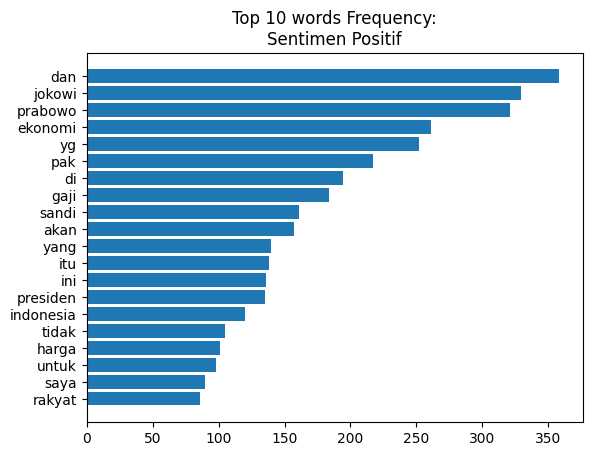

In [8]:
# visualisasi data 10 kata terbanyak sentimen positif

data_positif_no_hashtag_flattened = itertools.chain(*data_positif_no_hashtag)   # supaya tiap kata ga punya tingkatan kyk di list (flattened)
data_positif_no_hashtag_count = Counter(data_positif_no_hashtag_flattened)                # menghitung frequency kata tersebut
data_positif_no_hashtag_count_sorted = OrderedDict(sorted(data_positif_no_hashtag_count.items(), key = lambda kv : kv[1], reverse=False))

# visualisasi top hashtag terbanyak sentimen positif
import matplotlib.pyplot as plt

plt.barh(
    list(data_positif_no_hashtag_count_sorted.keys())[-20:],
    list(data_positif_no_hashtag_count_sorted.values())[-20:]
)
plt.title('Top 10 words Frequency:\nSentimen Positif')
plt.show()

## sentimen netral

In [9]:
# pisahin hastagh yg netral
hashtag_netral = []
for kalimat in data_netral:
  kalimat = re.sub(r'[^a-zA-Z0-9\s\#]', '', kalimat)   # hapus semua selain karakter usscii
  kalimat = re.findall(r'\#\S+', kalimat)
  hashtag_netral.append(kalimat)
# hapus hashtag yg berupa list kosong
for kata in hashtag_netral:
  if(kata == []):
    hashtag_netral.remove(kata)
#display(hashtag_netral[:5])
#display(len(hashtag_netral))

# data kata yg netral tanpa ada hashtag
data_netral_no_hashtag = []
for kalimat in data_netral:
  kalimat = kalimat.lower()
  kalimat = re.sub(r'\#\S+', ' ', kalimat)        # hapus yg kata hashtag
  kalimat = re.sub(r'http[s]?\:\//\S+', ' ', kalimat) # hapus url
  kalimat = re.sub(r'a{2,}', 'a', kalimat)        # hapus aaa to a
  kalimat = re.sub(r'i{2,}', 'i', kalimat)        # hapus iii to i dst
  kalimat = re.sub(r'u{2,}', 'u', kalimat)
  kalimat = re.sub(r'e{2,}', 'e', kalimat)
  kalimat = re.sub(r'o{2,}', 'o', kalimat)
  kalimat = re.sub(r'\\xa0', ' ', kalimat)        # hapus karakter \xa0
  kalimat = re.sub(r'[^a-zA-Z0-9\s]', ' ', kalimat)   # hapus semua selain karakter usscii
  kalimat = re.sub(r'\s+', ' ', kalimat)          # hapus extra spasi
  kalimat = re.sub(r'^\s|\s$', '', kalimat)       # hapus spasi di awal dan di akhir kalimat
  kalimat = re.split(r'\s', kalimat)
  data_netral_no_hashtag.append(kalimat)
#display(data_netral_no_hashtag[:5])
#display(len(data_netral_no_hashtag))

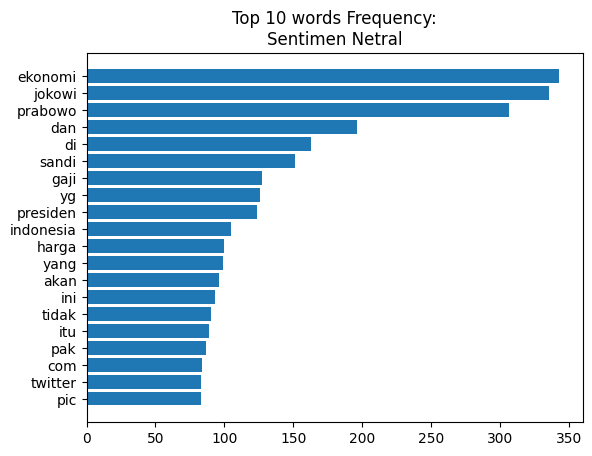

In [10]:
# visualisasi data no hashtag netral
import itertools
from collections import Counter, OrderedDict

data_netral_no_hashtag_flattened = itertools.chain(*data_netral_no_hashtag)
data_netral_no_hashtag_count = Counter(data_netral_no_hashtag_flattened)
data_netral_no_hashtag_count_sorted = OrderedDict(sorted(data_netral_no_hashtag_count.items(), key= lambda kv: kv[1], reverse=False))

import matplotlib.pyplot as plt

plt.barh(
    list(data_netral_no_hashtag_count_sorted.keys())[-20:],
    list(data_netral_no_hashtag_count_sorted.values())[-20:]
)
plt.title('Top 10 words Frequency:\nSentimen Netral')
plt.show()

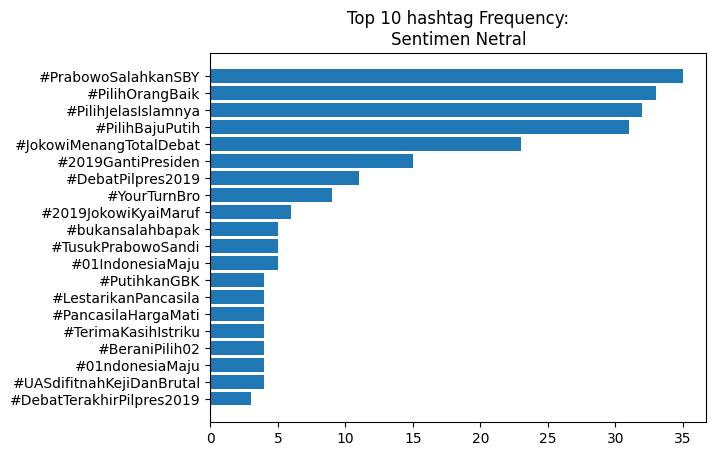

In [11]:
# visualisasi data 10 kata terbanyak dan 10 hashtag terbanyak di label sentimen netral
import itertools
from collections import Counter, OrderedDict

hashtag_netral_flattened = itertools.chain(*hashtag_netral)
hashtag_netral_count = Counter(hashtag_netral_flattened)
hashtag_netral_count_sorted = OrderedDict(sorted(hashtag_netral_count.items(), key = lambda kv : kv[1], reverse=False))

plt.barh(
    list(hashtag_netral_count_sorted.keys())[-20:],
    list(hashtag_netral_count_sorted.values())[-20:]
)
plt.title('Top 10 hashtag Frequency:\nSentimen Netral')
plt.show()

## Sentimen Negatif

In [12]:
# pisahin hashtag dan data yg negatif
hashtag_negatif = []
for kalimat in data_negatif:
  kalimat = re.sub(r'[^a-zA-Z0-9\s\#]', '', kalimat)
  kalimat = re.findall('\#\S+', kalimat)

  hashtag_negatif.append(kalimat)

for kata in hashtag_negatif:
  if(kata == []):
   hashtag_negatif.remove(kata)
#display(hashtag_negatif[:5])
#display(len(hashtag_negatif))

# data kata yg negatif tanpa hashtag
data_negatif_no_hashtag = []
for kalimat in data_negatif:
  kalimat = kalimat.lower()
  kalimat = re.sub(r'\#\S+', ' ', kalimat)      #hapus kata hashtag
  kalimat = re.sub(r'http[s]?\:\//\S+', ' ', kalimat)   # hapus url
  kalimat = re.sub(r'http[s]?\:\//\S+', ' ', kalimat) # hapus url
  kalimat = re.sub(r'a{2,}', 'a', kalimat)        # hapus aaa to a
  kalimat = re.sub(r'i{2,}', 'i', kalimat)        # hapus iii to i dst
  kalimat = re.sub(r'u{2,}', 'u', kalimat)
  kalimat = re.sub(r'e{2,}', 'e', kalimat)
  kalimat = re.sub(r'o{2,}', 'o', kalimat)
  kalimat = re.sub(r'\\xa0', ' ', kalimat)        # hapus karakter \xa0
  kalimat = re.sub(r'[^a-zA-Z0-9\s]', ' ', kalimat)   # hapus semua selain karakter usscii
  kalimat = re.sub(r'\s+', ' ', kalimat)          # hapus extra spasi
  kalimat = re.sub(r'^\s|\s$', '', kalimat)       # hapus spasi di awal dan di akhir kalimat
  kalimat = re.split(r'\s', kalimat)
  data_negatif_no_hashtag.append(kalimat)
display(data_negatif_no_hashtag[:5])
#display(len(data_negatif_no_hashtag))

[['kata',
  'prabowo',
  'indonesia',
  'tidak',
  'dihargai',
  'bangsa',
  'asing',
  'berita',
  'ini',
  'pasti',
  'hoax',
  'buatan',
  'penguasa',
  'ya',
  'kan',
  'rockygerung'],
 ['negara',
  'kita',
  'ngutang',
  'buat',
  'bngun',
  'infrastruktur',
  'yang',
  'udah',
  'dipake',
  'masyarakat',
  'terus',
  'masyarakatnya',
  'ngeluh',
  'karena',
  'negara',
  'ngutang',
  'setiap',
  'negara',
  'itu',
  'pasti',
  'ngutang',
  'utang',
  'bisa',
  'dibayar',
  'kalo',
  'negara',
  'dapet',
  'penghasilan',
  'penghasilan',
  'negara',
  'itu',
  'ya',
  'dari',
  'pajak'],
 ['prabowo',
  'sandi',
  'sepakat',
  'tak',
  'ambil',
  'gaji',
  'karena',
  'negara',
  'sedang',
  'susah'],
 ['gak',
  'nginti',
  'lu',
  'to',
  'yunartowijaya',
  'dan',
  'si',
  'at',
  'abdillahtoha',
  'juga',
  'gak',
  'ngaca',
  'gak',
  'usah',
  'ngajarin',
  'sandi',
  'soal',
  'ekonomi',
  'dibanding',
  'jokowi'],
 ['jika',
  'terpilih',
  'prabowo',
  'sandiaga',
  'janji',

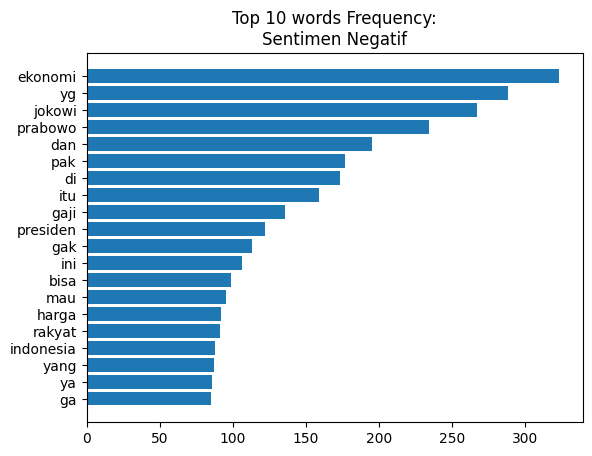

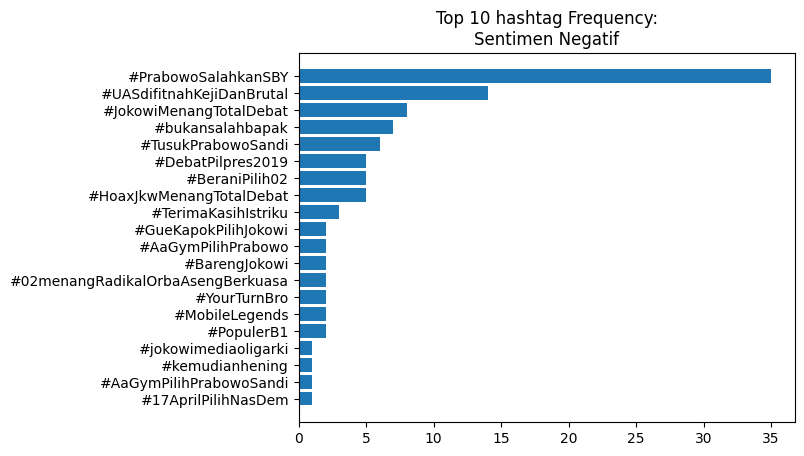

In [13]:
# visualisasi data negatif dan hashtag negatif
import itertools
from collections import Counter, OrderedDict

# untuk kata data negatif
data_negatif_no_hashtag_flattened = itertools.chain(*data_negatif_no_hashtag)
data_negatif_no_hashtag_count = Counter(data_negatif_no_hashtag_flattened)
data_negatif_no_hashtag_count_sorted = OrderedDict(sorted(data_negatif_no_hashtag_count.items(), key= lambda kv :kv[1], reverse=False))

import matplotlib.pyplot as plt

plt.barh(
    list(data_negatif_no_hashtag_count_sorted.keys())[-20:],
    list(data_negatif_no_hashtag_count_sorted.values())[-20:]
)
plt.title('Top 10 words Frequency:\nSentimen Negatif')
plt.show()

# untuk hashtag negatif
hashtag_negatif_flattened = itertools.chain(*hashtag_negatif)
hashtag_negatif_count = Counter(hashtag_negatif_flattened)
hashtag_negatif_count_sorted = OrderedDict(sorted(hashtag_negatif_count.items(), key= lambda kv :kv[1], reverse=False))

plt.barh(
    list(hashtag_negatif_count_sorted.keys())[-20:],
    list(hashtag_negatif_count_sorted.values())[-20:]
)
plt.title('Top 10 hashtag Frequency:\nSentimen Negatif')
plt.show()

# Kesimpulan EDA


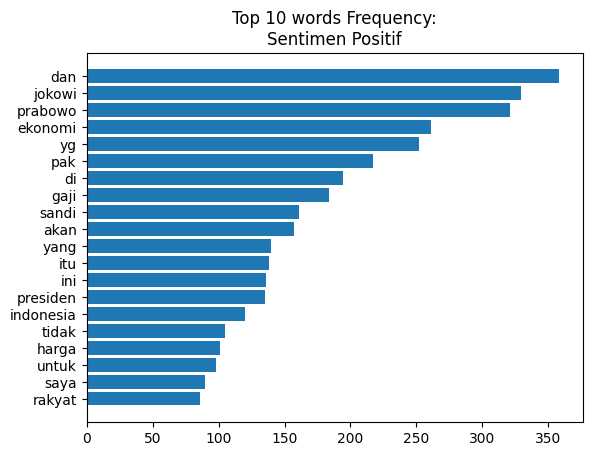

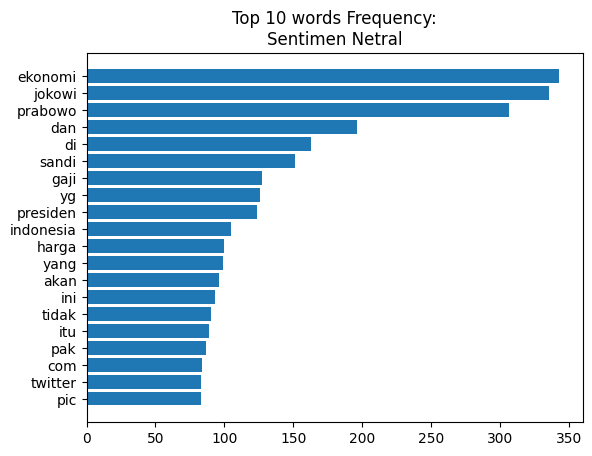

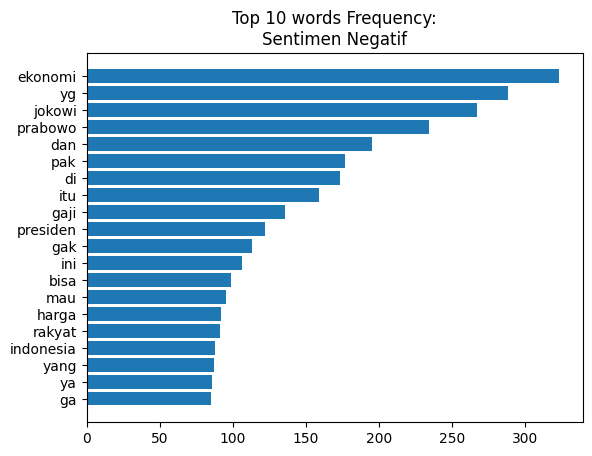

In [14]:
# visualisasi data 10 kata terbanyak sentimen positif

data_positif_no_hashtag_flattened = itertools.chain(*data_positif_no_hashtag)   # supaya tiap kata ga punya tingkatan kyk di list (flattened)
data_positif_no_hashtag_count = Counter(data_positif_no_hashtag_flattened)                # menghitung frequency kata tersebut
data_positif_no_hashtag_count_sorted = OrderedDict(sorted(data_positif_no_hashtag_count.items(), key = lambda kv : kv[1], reverse=False))

# visualisasi top hashtag terbanyak sentimen positif
import matplotlib.pyplot as plt

plt.barh(
    list(data_positif_no_hashtag_count_sorted.keys())[-20:],
    list(data_positif_no_hashtag_count_sorted.values())[-20:]
)
plt.title('Top 10 words Frequency:\nSentimen Positif')
plt.show()

# visualisasi data no hashtag netral
import itertools
from collections import Counter, OrderedDict

data_netral_no_hashtag_flattened = itertools.chain(*data_netral_no_hashtag)
data_netral_no_hashtag_count = Counter(data_netral_no_hashtag_flattened)
data_netral_no_hashtag_count_sorted = OrderedDict(sorted(data_netral_no_hashtag_count.items(), key= lambda kv: kv[1], reverse=False))

import matplotlib.pyplot as plt

plt.barh(
    list(data_netral_no_hashtag_count_sorted.keys())[-20:],
    list(data_netral_no_hashtag_count_sorted.values())[-20:]
)
plt.title('Top 10 words Frequency:\nSentimen Netral')
plt.show()

# visualisasi data no hashtag negatif
data_negatif_no_hashtag_flattened = itertools.chain(*data_negatif_no_hashtag)
data_negatif_no_hashtag_count = Counter(data_negatif_no_hashtag_flattened)
data_negatif_no_hashtag_count_sorted = OrderedDict(sorted(data_negatif_no_hashtag_count.items(), key= lambda kv :kv[1], reverse=False))

import matplotlib.pyplot as plt

plt.barh(
    list(data_negatif_no_hashtag_count_sorted.keys())[-20:],
    list(data_negatif_no_hashtag_count_sorted.values())[-20:]
)
plt.title('Top 10 words Frequency:\nSentimen Negatif')
plt.show()

stopwords = ['dan','yg','di', 'yang', 'itu', 'ini']

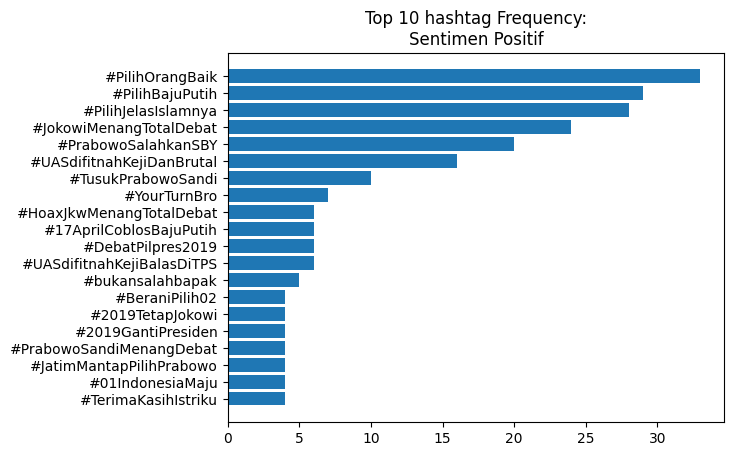

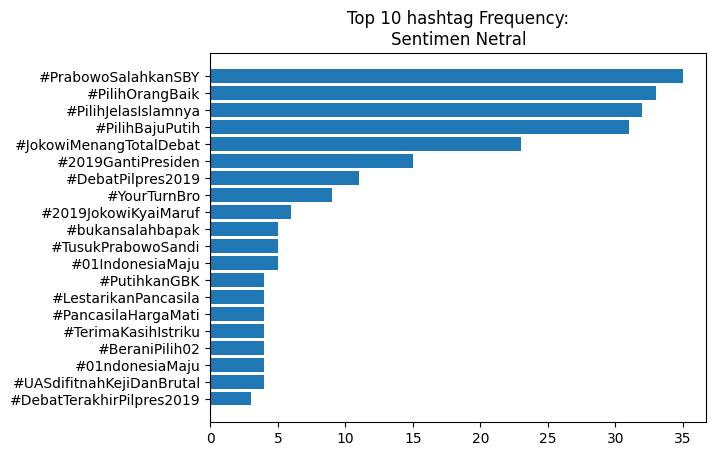

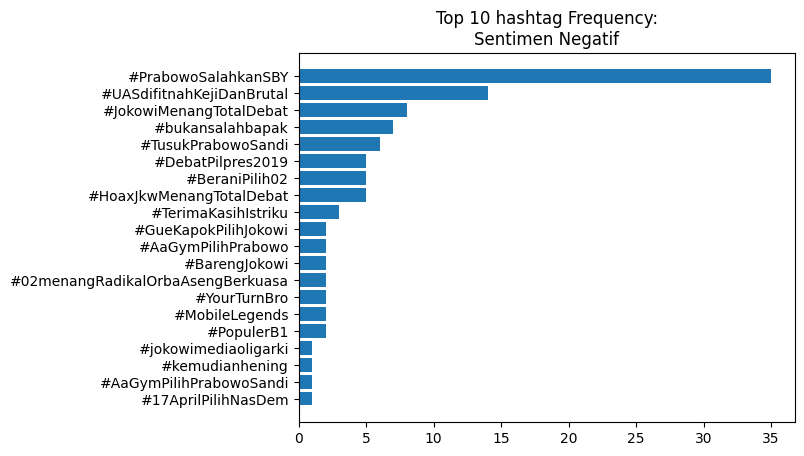

In [15]:
# visualisasi top hashtag terbanyak sentimen positif
import matplotlib.pyplot as plt

plt.barh(
    list(hashtag_positif_count_sorted.keys())[-20:],
    list(hashtag_positif_count_sorted.values())[-20:]
)
plt.title('Top 10 hashtag Frequency:\nSentimen Positif')
plt.show()

# visualisasi data 10 kata terbanyak dan 10 hashtag terbanyak di label sentimen netral
import itertools
from collections import Counter, OrderedDict

hashtag_netral_flattened = itertools.chain(*hashtag_netral)
hashtag_netral_count = Counter(hashtag_netral_flattened)
hashtag_netral_count_sorted = OrderedDict(sorted(hashtag_netral_count.items(), key = lambda kv : kv[1], reverse=False))

plt.barh(
    list(hashtag_netral_count_sorted.keys())[-20:],
    list(hashtag_netral_count_sorted.values())[-20:]
)
plt.title('Top 10 hashtag Frequency:\nSentimen Netral')
plt.show()

# untuk hashtag negatif
hashtag_negatif_flattened = itertools.chain(*hashtag_negatif)
hashtag_negatif_count = Counter(hashtag_negatif_flattened)
hashtag_negatif_count_sorted = OrderedDict(sorted(hashtag_negatif_count.items(), key= lambda kv :kv[1], reverse=False))

plt.barh(
    list(hashtag_negatif_count_sorted.keys())[-20:],
    list(hashtag_negatif_count_sorted.values())[-20:]
)
plt.title('Top 10 hashtag Frequency:\nSentimen Negatif')
plt.show()

In [16]:
data_netral_no_hashtag_count_sorted_by_frequency = OrderedDict(sorted(data_netral_no_hashtag_count.items(), key= lambda kv :kv[1], reverse=True))
#display(data_netral_no_hashtag_count_sorted_by_frequency)

# pre-processing berdasarkan temuan EDA

- kata yg selalu ada di setiap label (sugest to be stopword):

('dan', 'jokowi', 'prabowo', 'ekonomi', 'yg', 'pak', 'di', 'gaji', 'yang', 'itu', 'ini', 'presiden', 'indonesia', 'harga')

- dari grafik juga terlihat, jumlah hashtag sangat kecil sehingga tidak berpengaruh secara significant jika ingin merubah hashtag menjadi corpus kata, dan banyak hashtag yg berulang dipakai di semua label sentimen (hashtag tidak berkorelasi dg sentimen).
**Sehingga diputuskan hashtag dibuang saja**



# pre-processing ke-2 hapus stopword dan

## stopwords
remove kata yg sering muncul di setiap label, berdasarkan temuan EDA

In [17]:
stopwords = ['com','pic','twitter','id','dan', 'jokowi', 'prabowo', 'ekonomi', 'yg', 'pak', 'di', 'gaji', 'yang', 'itu', 'ini', 'presiden', 'indonesia', 'harga']

# cleaning data tiap label dari : hashtag, url, stopwords dll

In [18]:
# remove data positif dari stopwords
def remove_stopwords(text):
  stopwords = ['com','pic','twitter','id','dan', 'jokowi', 'prabowo', 'ekonomi', 'yg', 'pak', 'di', 'gaji', 'yang', 'itu', 'ini', 'presiden', 'indonesia', 'harga']
  tokens
  filtered_tokens = [token for token in tokens if token not in stopwords]
  cleaned_text = ' '.join(filtered_tokens)
  return cleaned_text
#data_positif_no_hashtag_2 = []
#for i in range(len(data_positif_no_hashtag)):
#  joined = ' '.join(data_positif_no_hashtag[i])
#  data_positif_no_hashtag_2.append(joined)
#display(len(data_positif_no_hashtag_2))
#for i in range(len(data_positif_no_hashtag_2))

In [19]:
#display(data_positif[:5])
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

stopwords = ['com','pic','twitter','id','dan', 'jokowi', 'prabowo', 'ekonomi', 'yg', 'pak', 'di', 'gaji', 'yang', 'itu', 'ini', 'presiden', 'indonesia', 'harga']


def remove_stopwords(text):
  text_lower = text.lower()
  stopwords = ['com','pic','twitter','id','dan', 'jokowi', 'prabowo', 'ekonomi', 'yg', 'pak', 'di', 'gaji', 'yang', 'itu', 'ini', 'presiden', 'indonesia', 'harga']
  tokens = word_tokenize(text_lower)
  filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
  cleaned_text = ' '.join(filtered_tokens)
  return cleaned_text

# pisahin dan remove stopwords, url, dan hashtag dll dari data positif
data_positif_no_hashtag_2 = []
for kalimat in data_positif:
  kalimat = re.sub(r'\#\S+', ' ', kalimat)
  kalimat = re.sub(r'http[s]?\:\//\S+', '', kalimat)
  kalimat = re.sub(r'[\s]?pic.twitter.com\/\S+', '', kalimat)
  kalimat = re.sub(r'a{2,}', 'a', kalimat)              # ganti huruf vokal berulang
  kalimat = re.sub(r'i{2,}', 'i', kalimat)
  kalimat = re.sub(r'u{2,}', 'u', kalimat)
  kalimat = re.sub(r'e{2,}', 'e', kalimat)
  kalimat = re.sub(r'o{2,}', 'o', kalimat)
  kalimat = re.sub('\\xa0', '', kalimat)
  kalimat = re.sub(r'[^a-zA-Z0-9\s]', ' ', kalimat)
  kalimat = kalimat.lower()
  kalimat = re.sub(r'\s+', ' ', kalimat)
  kalimat = re.sub(r'^\s|\s$', '', kalimat)
  data_positif_no_hashtag_2.append(kalimat)

# hapus kata stopwordsnya
data_positif_no_hashtag_stopwords_2 = []
for index in range(len(data_positif_no_hashtag_2)):
  cleaned = remove_stopwords(data_positif_no_hashtag_2[index])
  data_positif_no_hashtag_stopwords_2.append(cleaned)

# buat data jadi terpisah berdasarkan spasi
data_positif_no_hashtag_stopwords_splited_2 = []
for kalimat in data_positif_no_hashtag_stopwords_2:
  kalimat = re.split(r'\s', kalimat)
  data_positif_no_hashtag_stopwords_splited_2.append(kalimat)
#display(data_positif[4])
#display(data_positif_no_hashtag_stopwords_2[4])
#display(data_positif_no_hashtag_stopwords_splited_2[4])
print(f'Sum data Positif : {len(data_positif_no_hashtag_stopwords_2)}')

# cleaning data netral dari : hashtag, url, stopwords dll
data_netral_no_hashtag_2 = []
for kalimat in data_netral:
  kalimat = re.sub(r'\#\S+', ' ', kalimat)
  kalimat = re.sub(r'http[s]?\:\//\S+', '', kalimat)
  kalimat = re.sub(r'[\s]?pic.twitter.com\/\S+', '', kalimat)
  kalimat = re.sub(r'a{2,}', 'a', kalimat)              # ganti huruf vokal berulang
  kalimat = re.sub(r'i{2,}', 'i', kalimat)
  kalimat = re.sub(r'u{2,}', 'u', kalimat)
  kalimat = re.sub(r'e{2,}', 'e', kalimat)
  kalimat = re.sub(r'o{2,}', 'o', kalimat)
  kalimat = re.sub('\\xa0', '', kalimat)
  kalimat = re.sub(r'[^a-zA-Z0-9\s]', ' ', kalimat)
  kalimat = kalimat.lower()
  kalimat = re.sub(r'\s+', ' ', kalimat)
  kalimat = re.sub(r'^\s|\s$', '', kalimat)
  data_netral_no_hashtag_2.append(kalimat)

# hapus kata stopwordsnya
data_netral_no_hashtag_stopwords_2 = []
for index in range(len(data_netral_no_hashtag_2)):
  cleaned = remove_stopwords(data_netral_no_hashtag_2[index])
  data_netral_no_hashtag_stopwords_2.append(cleaned)

# buat data jadi terpisah berdasarkan spasi
data_netral_no_hashtag_stopwords_splited_2 = []
for kalimat in data_netral_no_hashtag_stopwords_2:
  kalimat = re.split('\s', kalimat)
  data_netral_no_hashtag_stopwords_splited_2.append(kalimat)

#display(data_netral[4])
#display(data_netral_no_hashtag_stopwords_2[4])
#display(data_netral_no_hashtag_stopwords_splited_2[4])
print(f'Sum data Netral : {len(data_netral_no_hashtag_stopwords_2)}')


# cleaning data negatif dari : hashtag, url, stopwords dll
data_negatif_no_hashtag_2 = []
for kalimat in data_negatif:
  kalimat = re.sub(r'\#\S+', ' ', kalimat)
  kalimat = re.sub(r'http[s]?\:\//\S+', '', kalimat)
  kalimat = re.sub(r'[\s]?pic.twitter.com\/\S+', '', kalimat)
  kalimat = re.sub(r'a{2,}', 'a', kalimat)              # ganti huruf vokal berulang
  kalimat = re.sub(r'i{2,}', 'i', kalimat)
  kalimat = re.sub(r'u{2,}', 'u', kalimat)
  kalimat = re.sub(r'e{2,}', 'e', kalimat)
  kalimat = re.sub(r'o{2,}', 'o', kalimat)
  kalimat = re.sub('\\xa0', '', kalimat)
  kalimat = re.sub(r'[^a-zA-Z0-9\s]', ' ', kalimat)
  kalimat = kalimat.lower()
  kalimat = re.sub(r'\s+', ' ', kalimat)
  kalimat = re.sub(r'^\s|\s$', '', kalimat)
  data_negatif_no_hashtag_2.append(kalimat)

# hapus kata stopwords
data_negatif_no_hashtag_stopwords_2 = []
for index in range(len(data_negatif_no_hashtag_2)):
  cleaned = remove_stopwords(data_negatif_no_hashtag_2[index])
  data_negatif_no_hashtag_stopwords_2.append(cleaned)

# ubah jadi kata terpisah berdasarkan spasi
data_negatif_no_hashtag_stopwords_splited_2 = []
for kalimat in data_negatif_no_hashtag_stopwords_2:
  kalimat = re.split('\s', kalimat)
  data_negatif_no_hashtag_stopwords_splited_2.append(kalimat)
#display(data_negatif[4])
#display(data_negatif_no_hashtag_stopwords_2[4])
#display(data_negatif_no_hashtag_stopwords_splited_2[4])
print(f'Sum data Negatif : {len(data_negatif_no_hashtag_stopwords_2)}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Sum data Positif : 612
Sum data Netral : 607
Sum data Negatif : 596


# Cek EDA ke-2
lihat kata apa saja yg masih potensi jadi stopwords

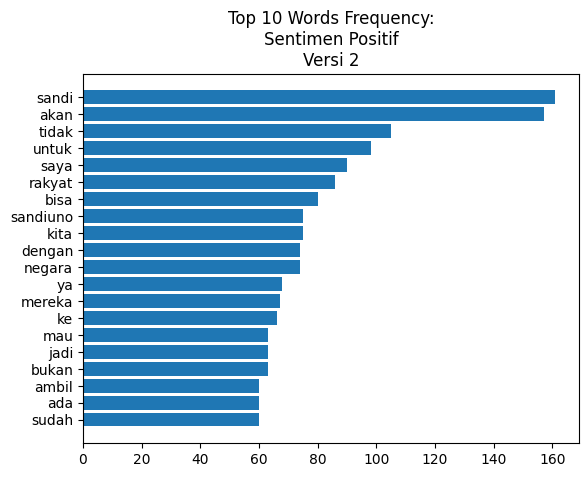

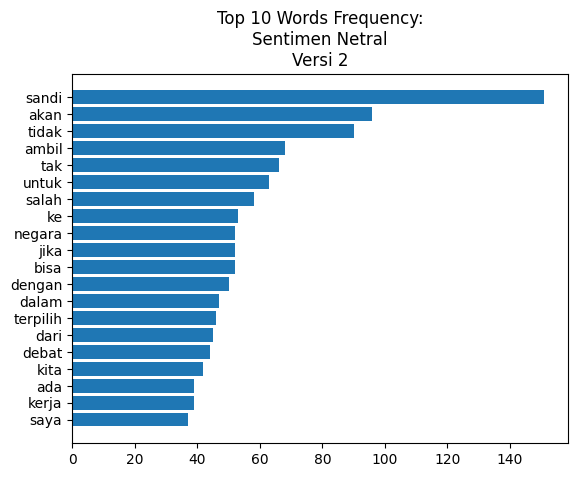

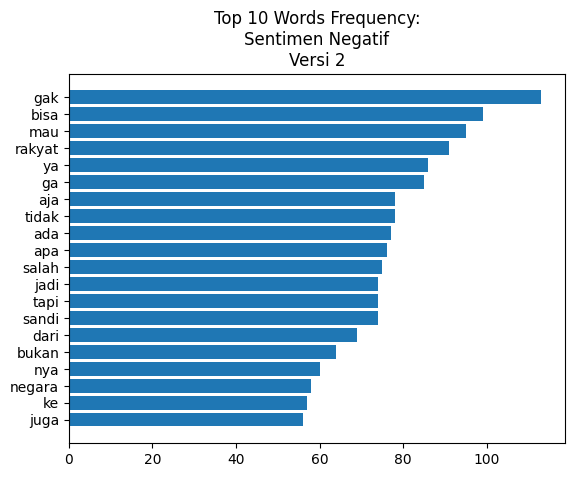

In [20]:
# visualisasi data data_positif_no_hashtag_stopwords_splited_2
import itertools
from collections import Counter, OrderedDict

data_positif_no_hashtag_stopwords_splited_2_flattened = itertools.chain(*data_positif_no_hashtag_stopwords_splited_2)
data_positif_no_hashtag_stopwords_splited_2_count = Counter(data_positif_no_hashtag_stopwords_splited_2_flattened)
data_positif_no_hashtag_stopwords_splited_2_count_sorted = OrderedDict(sorted(data_positif_no_hashtag_stopwords_splited_2_count.items(), key= lambda kv : kv[1], reverse=False))

import matplotlib.pyplot as plt
plt.barh(
    list(data_positif_no_hashtag_stopwords_splited_2_count_sorted.keys())[-20:],
    list(data_positif_no_hashtag_stopwords_splited_2_count_sorted.values())[-20:]
)
plt.title('Top 10 Words Frequency:\nSentimen Positif\nVersi 2')
plt.show()

# visualisasi data data_negatif_no_hashtag_stopwords_splited_2
data_netral_no_hashtag_stopwords_splited_2_flattened = itertools.chain(*data_netral_no_hashtag_stopwords_splited_2)
data_netral_no_hashtag_stopwords_splited_2_count = Counter(data_netral_no_hashtag_stopwords_splited_2_flattened)
data_netral_no_hashtag_stopwords_splited_2_count_sorted = OrderedDict(sorted(data_netral_no_hashtag_stopwords_splited_2_count.items(), key= lambda kv : kv[1], reverse=False))

plt.barh(
    list(data_netral_no_hashtag_stopwords_splited_2_count_sorted.keys())[-20:],
    list(data_netral_no_hashtag_stopwords_splited_2_count_sorted.values())[-20:]
)
plt.title('Top 10 Words Frequency:\nSentimen Netral\nVersi 2')
plt.show()

# visualisasi data data_negatif_no_hashtag_stopwords_splited_2
data_negatif_no_hashtag_stopwords_splited_2_flattened = itertools.chain(*data_negatif_no_hashtag_stopwords_splited_2)
data_negatif_no_hashtag_stopwords_splited_2_count = Counter(data_negatif_no_hashtag_stopwords_splited_2_flattened)
data_negatif_no_hashtag_stopwords_splited_2_count_sorted = OrderedDict(sorted(data_negatif_no_hashtag_stopwords_splited_2_count.items(), key= lambda kv:kv[1], reverse=False))

plt.barh(
    list(data_negatif_no_hashtag_stopwords_splited_2_count_sorted.keys())[-20:],
    list(data_negatif_no_hashtag_stopwords_splited_2_count_sorted.values())[-20:]
)
plt.title('Top 10 Words Frequency:\nSentimen Negatif\nVersi 2')
plt.show()

In [21]:
# ubah semua kata dictionary keys menjadi bentuk list
list_kata_positif_2 = list(data_positif_no_hashtag_stopwords_splited_2_count_sorted.keys())
list_kata_netral_2 = list(data_netral_no_hashtag_stopwords_splited_2_count_sorted.keys())
list_kata_negatif_2 = list(data_negatif_no_hashtag_stopwords_splited_2_count_sorted.keys())

# cari kata yg sama, selalu muncul di semua label (positif, netral, negatif)
kata_berpotensi_stopwords_2 = []
for kata_positif in list_kata_positif_2:
  for kata_negatif in list_kata_negatif_2:
    if (kata_negatif == kata_positif):
      for kata_netral in list_kata_netral_2:
        if (kata_netral == kata_negatif):
          #print(kata_netral)
          kata_berpotensi_stopwords_2.append(kata_netral)
display(len(kata_berpotensi_stopwords_2))
print(kata_berpotensi_stopwords_2)

1049

['mencapai', 'triliun', 'ngoceh', '16', 'media', 'gratis', 'tata', 'tutup', 'bolak', 'boneka', 'proyek', 'kebutuhan', 'kyk', 'emak', 'kekurangan', 'segi', 'kondisi', 'disebut', 'misi', 'hubungan', 'sombong', 'stagnan', 'ngomongin', 'emosi', 'istana', 'muncul', 'sj', 'menaikkan', 'toh', 'per', 'paket', 'th', 'penduduk', 'kinerja', 'dng', 'mending', 'mendapat', 'kritik', 'ahy', 'merespon', 'berkat', 'sepi', 'anggota', 'mengajak', 'pengaruh', 'sdm', 'boss', 'menyerang', 'buku', 'anak2', 'kegagalan', 'persen', 'mengeluh', 'senjata', 'mat', 'dijadikan', 'wisata', 'singapore', 'hehe', 'ingatkan', 'teriak', 'solo', 'merakyat', 'publik', 'minggu', '50', 'permasalahan', 'bhineka', 'proses', 'nama', 'faktor', 'kebanyakan', 'kesusahan', 'positif', 'org2', 'nangis', 'dibilang', 'kini', 'setahun', 'isi', 'tonton', 'gmn', 'gubernur', 'tingkat', 'target', 'membeli', 'dngan', 'tunjangannya', 'wah', 'membela', 'besok', 'bantu', 'sakit', 'caranya', 'donald', 'trump', 'kebijakannya', 'raya', 'mia', 'mill

In [22]:
# cleaning list_kata_positif dari kata_berpotensi_stopwords_2
list_kata_positif_2_no_stopwords = []
display(list_kata_positif_2[:10])
for kata in list_kata_positif_2:
  if (kata not in kata_berpotensi_stopwords_2):
    list_kata_positif_2_no_stopwords.append(kata)
print(f'Sum kata unik positif :{len(list_kata_positif_2)}')
print(f'Sum kata unik positif no stopwords 2 :{len(list_kata_positif_2_no_stopwords)}')
display(len(data_positif_no_hashtag_stopwords_splited_2))


['selatan',
 'diprediksi',
 'mencapai',
 '18',
 'triliun',
 'msih',
 'ngoceh',
 'kerjasa',
 'multilateral',
 'sambil']

Sum kata unik positif :3650
Sum kata unik positif no stopwords 2 :2601


612

# remove stopwords ke-2

In [28]:
#data_positif_no_hashtag_stopwords_2

def remove_stopwords_2(text):
  text_lower = text.lower()
  stopwords = kata_berpotensi_stopwords_2
  tokens = word_tokenize(text_lower)
  filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
  cleaned_text = ' '.join(filtered_tokens)
  return cleaned_text

# hapus kata stopwordsnya
  # data positif
data_positif_no_hashtag_stopwords_3 = []
for index in range(len(data_positif_no_hashtag_stopwords_2)):
  cleaned = remove_stopwords_2(data_positif_no_hashtag_stopwords_2[index])
  data_positif_no_hashtag_stopwords_3.append(cleaned)
data_positif_no_hashtag_stopwords_4 = list(filter(None,data_positif_no_hashtag_stopwords_3))
#display(data_positif_no_hashtag_stopwords_2[:5])
#display('\n')
#display(data_positif_no_hashtag_stopwords_3[:5])

  # data netral
data_netral_no_hashtag_stopwords_3 = []
for index in range(len(data_netral_no_hashtag_stopwords_2)):
  cleaned = remove_stopwords_2(data_netral_no_hashtag_stopwords_2[index])
  data_netral_no_hashtag_stopwords_3.append(cleaned)
data_netral_no_hashtag_stopwords_4 = list(filter(None,data_netral_no_hashtag_stopwords_3))
display(data_netral_no_hashtag_stopwords_2[:5])
display('\n')
display(data_netral_no_hashtag_stopwords_3[:5])
  # data Negatif
data_negatif_no_hashtag_stopwords_3 = []
for index in range(len(data_negatif_no_hashtag_stopwords_2)):
  cleaned = remove_stopwords_2(data_negatif_no_hashtag_stopwords_2[index])
  data_negatif_no_hashtag_stopwords_3.append(cleaned)
data_negatif_no_hashtag_stopwords_4 = list(filter(None,data_negatif_no_hashtag_stopwords_3))
#display(data_negatif_no_hashtag_stopwords_2[:5])
#display('\n')
#display(data_negatif_no_hashtag_stopwords_3[:5])

['batuan langka tasbih hadiah dari habib luthfi seharga mercy',
 'era semakin baik',
 'bisikin cm mikirin perputaran duit golongan tertentu e sports hanya sebagian kecil dr sekian besar penentu pertumbuhan perekonomian bukan hal fundamental betul dikatakan walau dgn bhs sederhana tp mrpkan aspek fundamental',
 'iya bener aa kita mantap kan pilihan ke pemimpin bs memberi solusi bukan menyalahkan pemimpin sebelumnya sbyudhoyono dismash sm mas bowo percuma koalisi klau mengantam tmn koalisi plg penting pilih pemimpin rajin ibadah wajib bisa ngaji jumatan',
 'terlalu berat nge bahas dgn angka2 cukup bahas mobil lejen aj']

'\n'

['batuan langka tasbih hadiah habib luthfi seharga mercy',
 '',
 'bisikin mikirin perputaran golongan sports sebagian penentu dikatakan bhs mrpkan aspek',
 'aa dismash bowo klau mengantam tmn plg rajin ibadah wajib jumatan',
 'berat nge angka2 lejen aj']

In [29]:
#data_netral_no_hashtag_stopwords_4 = list(filter(None,data_netral_no_hashtag_stopwords_3))
print(f'sum dokumen positif awal : {len(data_positif_no_hashtag_stopwords_3)}')
print(f'sum dokumen positif akhir : {len(data_positif_no_hashtag_stopwords_4)}')
print('\n')
print(f'sum dokumen netral awal : {len(data_netral_no_hashtag_stopwords_3)}')
print(f'sum dokumen netral akhir : {len(data_netral_no_hashtag_stopwords_4)}')
print('\n')
print(f'sum dokumen negatif awal : {len(data_negatif_no_hashtag_stopwords_3)}')
print(f'sum dokumen negatif akhir : {len(data_negatif_no_hashtag_stopwords_4)}')

sum dokumen positif awal : 612
sum dokumen positif akhir : 597


sum dokumen netral awal : 607
sum dokumen netral akhir : 540


sum dokumen negatif awal : 596
sum dokumen negatif akhir : 579


In [30]:
data_positif_no_hashtag_stopwords_3[:5]

['sumatera selatan asian berdampak diprediksi 18',
 'msih ttp',
 'kerjasa bilateral multilateral doakan sambil dengarkan',
 'pencapaiannya',
 'pra insentif kurun berpenghasilan']

# text pre-processing untuk data semua label
seperti yg dilakukan di sentimen positif/netral/negatif

supaya data tweet utuh ini clear, dan bisa di split untuk train dan test nanti

In [31]:
data_tweet = df['tweet']
data_tweet.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1815 entries, 0 to 1814
Series name: tweet
Non-Null Count  Dtype 
--------------  ----- 
1815 non-null   object
dtypes: object(1)
memory usage: 14.3+ KB


## bersihkan pola regex

In [32]:
data_tweet_cleaned_regex = []
for kalimat in data_tweet:
  kalimat = re.sub(r'\#\S+', ' ', kalimat)
  kalimat = re.sub(r'http[s]?\:\//\S+', '', kalimat)
  kalimat = re.sub(r'[\s]?pic.twitter.com\/\S+', '', kalimat)
  kalimat = re.sub(r'a{2,}', 'a', kalimat)              # ganti huruf vokal berulang
  kalimat = re.sub(r'i{2,}', 'i', kalimat)
  kalimat = re.sub(r'u{2,}', 'u', kalimat)
  kalimat = re.sub(r'e{2,}', 'e', kalimat)
  kalimat = re.sub(r'o{2,}', 'o', kalimat)
  kalimat = re.sub('\\xa0', '', kalimat)
  kalimat = re.sub(r'[^a-zA-Z0-9\s]', ' ', kalimat)
  kalimat = kalimat.lower()
  kalimat = re.sub(r'\s+', ' ', kalimat)
  kalimat = re.sub(r'^\s|\s$', '', kalimat)
  data_tweet_cleaned_regex.append(kalimat)

# hapus stopwords
stopwords_final = stopwords + kata_berpotensi_stopwords_2
print(f'banyak stopwords final :{len(stopwords_final)}')



# remove data positif dari stopwords
def remove_stopwords_final(text):
  text_lower = text.lower()
  stopwords = stopwords_final
  tokens = word_tokenize(text_lower)
  filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
  cleaned_text = ' '.join(filtered_tokens)
  return cleaned_text

# hapus kata stopwordsnya
data_tweet_cleaned_regex_no_stopwords_final = []
for index in range(len(data_tweet_cleaned_regex)):
  cleaned = remove_stopwords_final(data_tweet_cleaned_regex[index])
  data_tweet_cleaned_regex_no_stopwords_final.append(cleaned)

# hapus dokumen di list yg kosong (none) karena semua katanya dihapus stopword final
#data_tweet_cleaned_regex_no_stopwords_final_2 = list(filter(None,data_tweet_cleaned_regex_no_stopwords_final))
display(data_tweet_cleaned_regex_no_stopwords_final[:5])
display(len(data_tweet_cleaned_regex_no_stopwords_final))

banyak stopwords final :1067


['asing berita buatan penguasa rockygerung',
 'batuan langka tasbih hadiah habib luthfi seharga mercy',
 '',
 'sumatera selatan asian berdampak diprediksi 18',
 'ngutang bngun dipake masyarakatnya ngeluh ngutang ngutang dapet']

1815

In [35]:
list1 = data_tweet_cleaned_regex_no_stopwords_final
list2 = df['sentimen'].tolist()

df_data_2 = pd.DataFrame(list(zip(list1, list2)), columns=['tweet','sentimen'])
df_data_2

,tweet,sentimen
0,asing berita buatan penguasa rockygerung,negatif
1,batuan langka tasbih hadiah habib luthfi sehar...,netral
2,,netral
3,sumatera selatan asian berdampak diprediksi 18,positif
4,ngutang bngun dipake masyarakatnya ngeluh ngut...,negatif
...,...,...
1810,sejati sll mengedepankan bangsanya,netral
1811,ceramah indonesiaku,netral
1812,mari,netral
1813,majukan,netral


In [44]:
df_data_2_filtered = df_data_2[df_data_2.tweet !='']
df_data_2_filtered


,tweet,sentimen
0,asing berita buatan penguasa rockygerung,negatif
1,batuan langka tasbih hadiah habib luthfi sehar...,netral
3,sumatera selatan asian berdampak diprediksi 18,positif
4,ngutang bngun dipake masyarakatnya ngeluh ngut...,negatif
5,bisikin mikirin perputaran golongan sports seb...,netral
...,...,...
1810,sejati sll mengedepankan bangsanya,netral
1811,ceramah indonesiaku,netral
1812,mari,netral
1813,majukan,netral


In [47]:
data_tweet_cleaned_regex_no_stopwords_final_2 = list(df_data_2_filtered['tweet'])
label_tweet_filtered = list(df_data_2_filtered['sentimen'])

In [46]:
print(f'Jumlah dokumen awal :{len(data_tweet)}')
print(f'Jumlah dokumen final :{len(data_tweet_cleaned_regex_no_stopwords_final_2)}')

Jumlah dokumen awal :1815
Jumlah dokumen final :1716


# word tokenize

In [97]:
data_tweet_cleaned_regex_no_stopwords_final_2_tokenized = []
for kalimat in (data_tweet_cleaned_regex_no_stopwords_final_2):
  kalimat = re.split(r'\s', kalimat)
  data_tweet_cleaned_regex_no_stopwords_final_2_tokenized.append(kalimat)
display(data_tweet_cleaned_regex_no_stopwords_final_2_tokenized[:5])
display(len(data_tweet_cleaned_regex_no_stopwords_final_2_tokenized))

[['asing', 'berita', 'buatan', 'penguasa', 'rockygerung'],
 ['batuan',
  'langka',
  'tasbih',
  'hadiah',
  'habib',
  'luthfi',
  'seharga',
  'mercy'],
 ['sumatera', 'selatan', 'asian', 'berdampak', 'diprediksi', '18'],
 ['ngutang',
  'bngun',
  'dipake',
  'masyarakatnya',
  'ngeluh',
  'ngutang',
  'ngutang',
  'dapet'],
 ['bisikin',
  'mikirin',
  'perputaran',
  'golongan',
  'sports',
  'sebagian',
  'penentu',
  'dikatakan',
  'bhs',
  'mrpkan',
  'aspek']]

1716

# vectorisasi

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
# menggunakan TFidf ke semua data
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data_tweet_cleaned_regex_no_stopwords_final_2)

In [99]:
tfidf.shape

(1716, 6031)

In [100]:
display(tfidf)

<1716x6031 sparse matrix of type '<class 'numpy.float64'>'
	with 10561 stored elements in Compressed Sparse Row format>

In [101]:
# ubah vector tfidv ke bentuk data frame supaya mudah dilihat
tfidf_array = tfidf.toarray()
df_vectorized = pd.DataFrame(data= tfidf_array, columns= vectorizer.get_feature_names_out())
df_vectorized

,000,08,09,1000,10rb,10th,12,120,12kg,13000,...,yurop,yusuf,zaenal,zakat,zer,zero,ziarah,zippo,zon,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer.vocabulary_

{'asing': 349,
 'berita': 619,
 'buatan': 863,
 'penguasa': 4393,
 'rockygerung': 4858,
 'batuan': 480,
 'langka': 2910,
 'tasbih': 5470,
 'hadiah': 1911,
 'habib': 1901,
 'luthfi': 3018,
 'seharga': 5031,
 'mercy': 3614,
 'sumatera': 5375,
 'selatan': 5076,
 'asian': 347,
 'berdampak': 584,
 'diprediksi': 1364,
 '18': 18,
 'ngutang': 3971,
 'bngun': 804,
 'dipake': 1337,
 'masyarakatnya': 3166,
 'ngeluh': 3927,
 'dapet': 1058,
 'bisikin': 776,
 'mikirin': 3657,
 'perputaran': 4489,
 'golongan': 1861,
 'sports': 5311,
 'sebagian': 4988,
 'penentu': 4354,
 'dikatakan': 1255,
 'bhs': 741,
 'mrpkan': 3746,
 'aspek': 355,
 'msih': 3749,
 'ttp': 5758,
 'kerjasa': 2617,
 'bilateral': 757,
 'multilateral': 3782,
 'doakan': 1506,
 'sambil': 4915,
 'dengarkan': 1093,
 'aa': 100,
 'dismash': 1427,
 'bowo': 827,
 'klau': 2731,
 'mengantam': 3427,
 'tmn': 5689,
 'plg': 4579,
 'rajin': 4759,
 'ibadah': 2052,
 'wajib': 5902,
 'jumatan': 2332,
 'pencapaiannya': 4332,
 'pra': 4634,
 'insentif': 2140,


# ubah label sentimen menjadi 2/1/0
- positif = 2
- netral = 1
- negatif = 0


In [ ]:
# ubah list data yg udah di cleaning ke data frame dulu
# caranya gabung dulu df_vectorized dengan labelnya
  # karena jumlah rownya sudah berubah bisa ditangani dengan :
    # 1. jangan hapus list data yg kosong di atasm di vectorizer dulu dan digabung label baru di clear null value
    # 2. buat label baru yg jumlahnya 1700an juga, dengan data list yg udah di bersiihin (yg null jangan dihapus), digabung dengan label dulu, baru dapet label yg 1700an

In [48]:
mapping = {
    'positif':2,
    'netral':1,
    'negatif':0
}

df_data_2_filtered['sentimen'] = [mapping[label] for label in df_data_2_filtered['sentimen']]
df_data_2_filtered

<ipython-input-48-80ee36d71558>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_2_filtered['sentimen'] = [mapping[label] for label in df_data_2_filtered['sentimen']]


,tweet,sentimen
0,asing berita buatan penguasa rockygerung,0
1,batuan langka tasbih hadiah habib luthfi sehar...,1
3,sumatera selatan asian berdampak diprediksi 18,2
4,ngutang bngun dipake masyarakatnya ngeluh ngut...,0
5,bisikin mikirin perputaran golongan sports seb...,1
...,...,...
1810,sejati sll mengedepankan bangsanya,1
1811,ceramah indonesiaku,1
1812,mari,1
1813,majukan,1


In [95]:
label = df_data_2_filtered['sentimen']

# Split Data

In [49]:
df_data_2_filtered['tweet'] = df_data_2_filtered['tweet'].astype(str)
df_data_2_filtered['tweet'] = df_data_2_filtered['tweet'].fillna('')

<ipython-input-49-18706365fc8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_2_filtered['tweet'] = df_data_2_filtered['tweet'].astype(str)
<ipython-input-49-18706365fc8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_2_filtered['tweet'] = df_data_2_filtered['tweet'].fillna('')


In [50]:
features = df_data_2_filtered['tweet']
target = df_data_2_filtered['sentimen']

In [54]:
X = features
Y = target
#display(X)
#display(Y)

In [56]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [57]:
train_tweet, test_tweet, train_sentimen, test_sentimen = train_test_split(df_data_2_filtered['tweet'].to_numpy(), df_data_2_filtered['sentimen'].to_numpy(), test_size=0.2, random_state=0)

In [58]:
round(sum([len(i.split()) for i in train_tweet])/len(train_tweet))

6

In [59]:
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 19 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int",
    output_sequence_length=max_length)

In [60]:
text_vectorizer

In [61]:
text_vectorizer.adapt(X_train.to_numpy())

In [62]:
sample_setence = X_train[0]
text_vectorizer([sample_setence])

<tf.Tensor: shape=(1, 19), dtype=int64, numpy=
array([[ 168,   40, 4708, 2619,  950,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])>

In [63]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:10] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-10:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 5197
Top 5 most common words: ['', '[UNK]', 'nkri', 'gitu', 'trus', 'jae', 'ente', 'daerah', 'bowo', 'setuju']
Bottom 5 least common words: ['1500rp', '14t', '1400', '13000', '12kg', '120', '10th', '1000', '09', '08']


# Embedding

In [66]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=64,
    embeddings_initializer="uniform",
    input_length=max_length,
    name="embedding_1")

embedding

In [68]:
# Get a random sentence from training set
import random
random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")
# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
ngehapusin nambah lho lho      

Embedded version:


<tf.Tensor: shape=(1, 19, 64), dtype=float32, numpy=
array([[[ 0.00285047,  0.01517898,  0.02239003, ...,  0.0396009 ,
          0.04661267, -0.00102999],
        [ 0.0008095 ,  0.02160582, -0.010576  , ...,  0.00568172,
          0.02952052, -0.01819385],
        [-0.00461812,  0.00966536,  0.02880791, ...,  0.01831093,
         -0.02587295, -0.04872111],
        ...,
        [ 0.01546109, -0.00440709,  0.03871271, ...,  0.01299134,
         -0.04015716, -0.01450511],
        [ 0.01546109, -0.00440709,  0.03871271, ...,  0.01299134,
         -0.04015716, -0.01450511],
        [ 0.01546109, -0.00440709,  0.03871271, ...,  0.01299134,
         -0.04015716, -0.01450511]]], dtype=float32)>

In [69]:
def calculate_results(y_true, y_pred):

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

# Model LSTM 1

In [70]:
def model1():

  inputs = layers.Input(shape=(1,), dtype="string")
  x = text_vectorizer(inputs)
  layer = embedding(x)
  layer = layers.LSTM(32)(layer)
  layer = layers.Dense(3, name='out_layer')(layer)
  layer = layers.Activation('softmax')(layer)
  model = tf.keras.Model(inputs=inputs, outputs=layer, name="model_1_LSTM")
  return model

In [71]:
lstm1 = model1()
lstm1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
lstm1.summary()

Model: "model_1_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 19)                0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 19, 64)            640000    
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 out_layer (Dense)           (None, 3)                 99        
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                      

In [75]:
lstm1_history = lstm1.fit(X_train, np.float32(Y_train),
                          epochs=20,
                          batch_size=256,
                          validation_data=(X_test, np.float32(Y_test)),)

Epoch 1/20
6/6 [==============================] - 2s 110ms/step - loss: 1.0990 - accuracy: 0.3397 - val_loss: 1.0958 - val_accuracy: 0.3895
Epoch 2/20
6/6 [==============================] - 0s 26ms/step - loss: 1.0954 - accuracy: 0.3644 - val_loss: 1.0953 - val_accuracy: 0.3924
Epoch 3/20
6/6 [==============================] - 0s 26ms/step - loss: 1.0907 - accuracy: 0.4767 - val_loss: 1.0929 - val_accuracy: 0.4390
Epoch 4/20
6/6 [==============================] - 0s 26ms/step - loss: 1.0786 - accuracy: 0.6093 - val_loss: 1.0834 - val_accuracy: 0.4826
Epoch 5/20
6/6 [==============================] - 0s 28ms/step - loss: 1.0469 - accuracy: 0.6625 - val_loss: 1.0574 - val_accuracy: 0.4797
Epoch 6/20
6/6 [==============================] - 0s 26ms/step - loss: 0.9547 - accuracy: 0.6487 - val_loss: 0.9916 - val_accuracy: 0.5145
Epoch 7/20
6/6 [==============================] - 0s 27ms/step - loss: 0.7513 - accuracy: 0.6669 - val_loss: 0.9285 - val_accuracy: 0.5058
Epoch 8/20
6/6 [==========

In [123]:
# Access the training history
train_loss = lstm1_history.history['loss']
val_loss = lstm1_history.history['val_loss']
train_accuracy = lstm1_history.history['accuracy']
val_accuracy = lstm1_history.history['val_accuracy']

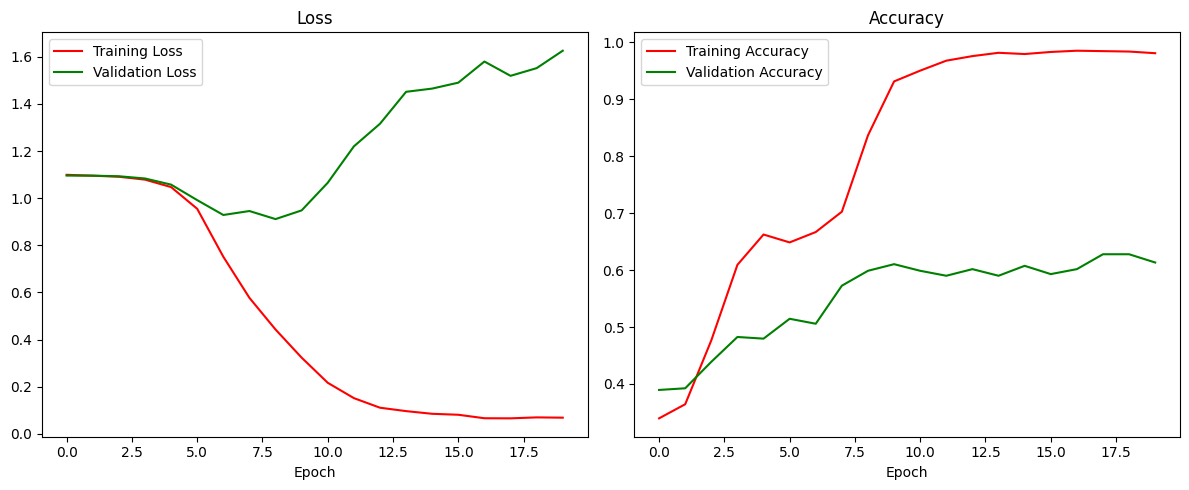

In [124]:
import matplotlib.pyplot as plt
# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', c='red')
plt.plot(val_loss, label='Validation Loss', c='green')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', c='red')
plt.plot(val_accuracy, label='Validation Accuracy', c='green')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [76]:
test_sentimen

array([0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2,
       1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       1, 2, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1,
       2, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1,

In [79]:
# Make predictions on the validation dataset
model_1_pred_probs = lstm1.predict(test_tweet)
display(model_1_pred_probs.shape, model_1_pred_probs[:10]) # view the first 10

model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds = np.argmax(model_1_preds, axis=1)

# Calculate LSTM model results
model_1_results = calculate_results(y_true=test_sentimen,
                                    y_pred=model_1_preds)
display(model_1_results)

display(tf.squeeze(tf.round(lstm1.predict(np.array(['Pak @sandiuno dan pak @prabowo Gajinya kirim ke saya sj'])))).numpy())

11/11 [==============================] - 0s 2ms/step


(344, 3)

array([[7.7410154e-03, 2.6856177e-02, 9.6540284e-01],
       [9.8163295e-01, 9.5949566e-04, 1.7407617e-02],
       [7.4520402e-02, 5.2663637e-03, 9.2021316e-01],
       [1.5079577e-02, 1.2236867e-02, 9.7268361e-01],
       [9.8802572e-01, 1.0006103e-03, 1.0973662e-02],
       [9.8766351e-01, 1.1207126e-03, 1.1215653e-02],
       [9.8797697e-01, 1.0306744e-03, 1.0992288e-02],
       [6.2191661e-02, 6.4107603e-03, 9.3139750e-01],
       [9.8775649e-01, 9.6954755e-04, 1.1273956e-02],
       [4.8865615e-03, 9.7982836e-01, 1.5285032e-02]], dtype=float32)

{'accuracy': 61.337209302325576,
 'precision': 0.6216502022665468,
 'recall': 0.6133720930232558,
 'f1': 0.6127542298525815}

1/1 [==============================] - 0s 14ms/step


array([0., 0., 1.], dtype=float32)

In [80]:
predicted_sentiment = []

for idx in range(len(test_tweet)):
  predicted = tf.squeeze(tf.round(lstm1.predict(np.array([test_tweet[idx]])))).numpy()
  predicted_sentiment.append(predicted)

1/1 [==============================] - 0s 15ms/step


In [81]:
predicted_sentiment

[array([0., 0., 1.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([0., 1., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([0., 1., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([0., 1., 0.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([0., 1., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 array([0., 1., 0.], dtype=float32),
 array([1., 0., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32),
 

In [82]:
predicted_dataframe = pd.DataFrame(columns=['sentimen', 'predicted_sentimen', 'tweet'])

In [83]:
predicted_dataframe['sentimen'] = test_sentimen
predicted_dataframe['predicted_sentimen'] = [np.argmax(array) for array in predicted_sentiment]
predicted_dataframe['tweet'] = test_tweet

display(predicted_dataframe)

,sentimen,predicted_sentimen,tweet
0,0,2,dikeluarkan
1,2,0,kerjasa bilateral multilateral doakan sambil d...
2,2,2,gtu2 donk belajarlah karya seseorang belajar d...
3,0,2,petinggi kenyatan hinan pertanda kadernya marw...
4,0,0,dasarkan bawa
...,...,...,...
339,1,1,bumn benteng
340,2,2,setuju memikirkan bu mega sisi daripada seseorang
341,1,2,jalannya
342,2,0,siapapun wong njenengan njenengan


In [84]:
print("Akurasi: ", accuracy_score(predicted_dataframe['sentimen'], predicted_dataframe['predicted_sentimen']))

Akurasi:  0.6133720930232558


# Model LSTM 4

In [115]:
def model4():

  inputs = layers.Input(shape=(1,), dtype="string")
  x = text_vectorizer(inputs)
  layer = embedding(x)
  layer = layers.LSTM(64)(layer)
  layer = layers.Dense(256, name='FC1')(layer)
  layer = layers.Dense(256,)(layer)
  layer = layers.Dense(256,)(layer)
  layer = layers.Dense(256,)(layer)
  layer = layers.Activation('relu')(layer)
  layer = layers.Dropout(0.5)(layer)
  layer = layers.Dense(3, name='out_layer')(layer)
  layer = layers.Activation('softmax')(layer)
  model = tf.keras.Model(inputs=inputs, outputs=layer)
  return model

In [116]:
lstm4 = model4()
lstm4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
lstm4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 19)                0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 19, 64)            640000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                             

In [117]:
lstm4_history = lstm4.fit(X_train, np.float32(Y_train),
                          epochs=20, # 20
                          batch_size=256, # 256
                          validation_data=(X_test, np.float32(Y_test)),)

Epoch 1/20
6/6 [==============================] - 5s 277ms/step - loss: 1.0966 - accuracy: 0.3542 - val_loss: 1.0942 - val_accuracy: 0.3081
Epoch 2/20
6/6 [==============================] - 0s 42ms/step - loss: 1.0408 - accuracy: 0.5219 - val_loss: 1.0306 - val_accuracy: 0.5029
Epoch 3/20
6/6 [==============================] - 0s 43ms/step - loss: 0.7505 - accuracy: 0.7034 - val_loss: 1.1082 - val_accuracy: 0.5378
Epoch 4/20
6/6 [==============================] - 0s 44ms/step - loss: 0.3532 - accuracy: 0.8695 - val_loss: 1.6294 - val_accuracy: 0.5436
Epoch 5/20
6/6 [==============================] - 0s 46ms/step - loss: 0.1329 - accuracy: 0.9526 - val_loss: 3.1151 - val_accuracy: 0.5552
Epoch 6/20
6/6 [==============================] - 0s 50ms/step - loss: 0.1148 - accuracy: 0.9650 - val_loss: 3.9193 - val_accuracy: 0.5698
Epoch 7/20
6/6 [==============================] - 0s 45ms/step - loss: 0.1070 - accuracy: 0.9796 - val_loss: 3.8376 - val_accuracy: 0.5581
Epoch 8/20
6/6 [==========

In [118]:
# Access the training history
train_loss = lstm4_history.history['loss']
val_loss = lstm4_history.history['val_loss']
train_accuracy = lstm4_history.history['accuracy']
val_accuracy = lstm4_history.history['val_accuracy']

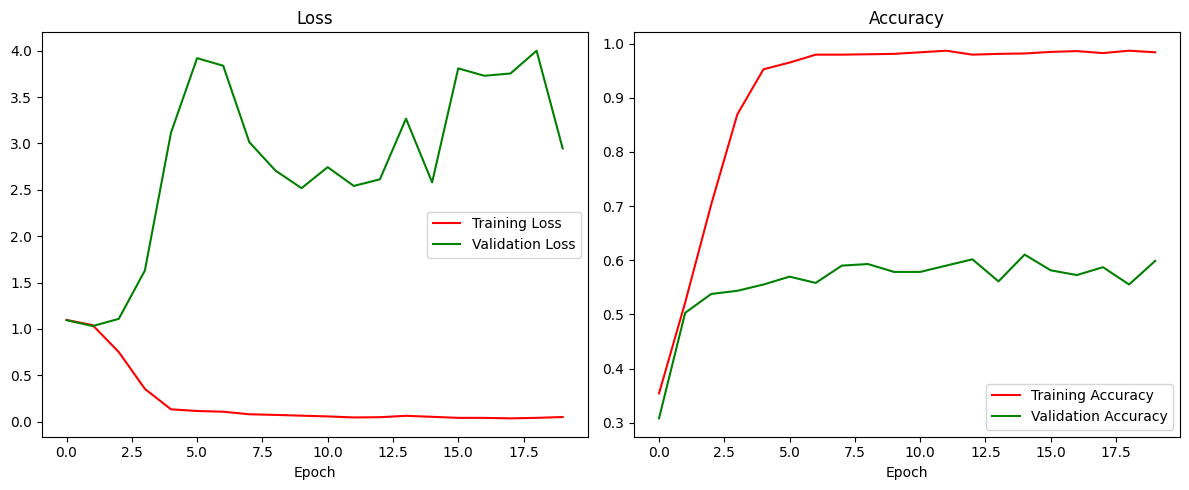

In [119]:
import matplotlib.pyplot as plt
# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', c='red')
plt.plot(val_loss, label='Validation Loss', c='green')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', c='red')
plt.plot(val_accuracy, label='Validation Accuracy', c='green')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [120]:
# Make predictions on the validation dataset
model_4_pred_probs = lstm4.predict(test_tweet)
display(model_4_pred_probs.shape, model_4_pred_probs[:10]) # view the first 10

model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds = np.argmax(model_4_preds, axis=1)

# Calculate LSTM model results
model_4_results = calculate_results(y_true=test_sentimen,
                                    y_pred=model_4_preds)
display(model_4_results)

display(tf.squeeze(tf.round(lstm4.predict(np.array(['Pak @sandiuno dan pak @prabowo Gajinya kirim ke saya sj'])))).numpy())

11/11 [==============================] - 1s 9ms/step


(344, 3)

array([[5.85760958e-02, 3.72851729e-01, 5.68572223e-01],
       [9.96436238e-01, 6.05825223e-10, 3.56379244e-03],
       [6.26131445e-02, 4.00671615e-06, 9.37382817e-01],
       [3.66137316e-03, 2.52156565e-03, 9.93817091e-01],
       [9.99999940e-01, 2.59788686e-19, 3.74597214e-10],
       [9.99999940e-01, 4.62914726e-35, 2.16127693e-21],
       [9.99999940e-01, 1.14447905e-28, 1.02374103e-16],
       [7.79032183e-04, 1.91813215e-05, 9.99201715e-01],
       [9.99999821e-01, 4.48115369e-17, 1.16271174e-07],
       [1.92318097e-04, 9.99799252e-01, 8.31819125e-06]], dtype=float32)

{'accuracy': 59.59302325581395,
 'precision': 0.5972956360133906,
 'recall': 0.5959302325581395,
 'f1': 0.5963639871739111}

1/1 [==============================] - 0s 25ms/step


array([0., 0., 1.], dtype=float32)

In [121]:
predicted_sentiment = []

for idx in range(len(test_tweet)):
  predicted = tf.squeeze(tf.round(lstm4.predict(np.array([test_tweet[idx]])))).numpy()
  predicted_sentiment.append(predicted)

1/1 [==============================] - 0s 16ms/step


In [122]:
predicted_dataframe['sentimen'] = test_sentimen
predicted_dataframe['predicted_sentimen'] = [np.argmax(array) for array in predicted_sentiment]
predicted_dataframe['tweet'] = test_tweet

display(predicted_dataframe)

,sentimen,predicted_sentimen,tweet
0,0,2,dikeluarkan
1,2,0,kerjasa bilateral multilateral doakan sambil d...
2,2,2,gtu2 donk belajarlah karya seseorang belajar d...
3,0,2,petinggi kenyatan hinan pertanda kadernya marw...
4,0,0,dasarkan bawa
...,...,...,...
339,1,1,bumn benteng
340,2,2,setuju memikirkan bu mega sisi daripada seseorang
341,1,2,jalannya
342,2,2,siapapun wong njenengan njenengan


# Random Forest

In [102]:
# gabung data sama label
data_gabungan = pd.merge(df_vectorized, label, left_index= True, right_index=True)
data_gabungan

,000,08,09,1000,10rb,10th,12,120,12kg,13000,...,yusuf,zaenal,zakat,zer,zero,ziarah,zippo,zon,zonk,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [105]:
y_data = data_gabungan.sentimen.values
X_data = data_gabungan.drop(['sentimen'], axis=1)

In [106]:
X_data

,000,08,09,1000,10rb,10th,12,120,12kg,13000,...,yurop,yusuf,zaenal,zakat,zer,zero,ziarah,zippo,zon,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
y_data

array([0, 1, 2, ..., 2, 0, 1])

In [109]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.2, random_state=1)

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
model_score = rf_clf.score(x_test, y_test)
print('Model Accuracy:', model_score)

y_pred = rf_clf.predict(x_test)
print(classification_report(y_test,y_pred))

Model Accuracy: 0.3446153846153846
              precision    recall  f1-score   support

           0       0.34      0.21      0.26       115
           1       0.32      0.08      0.12       106
           2       0.35      0.77      0.48       104

    accuracy                           0.34       325
   macro avg       0.34      0.35      0.29       325
weighted avg       0.34      0.34      0.28       325



In [113]:
X_vect = text_vectorizer(X_train)
X_embedd = embedding(X_vect)

In [114]:
XT_vect = text_vectorizer(X_test)
rfc_score = rfc.score(XT_vect, np.float32(Y_test))
print(rfc_score)

NotFittedError: ignored

In [91]:
from sklearn.metrics import classification_report
y_pred = rfc.predict(XT_vect)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.21      0.26       106
           1       0.36      0.64      0.46       104
           2       0.43      0.29      0.35       134

    accuracy                           0.37       344
   macro avg       0.37      0.38      0.35       344
weighted avg       0.38      0.37      0.35       344

